In [38]:
import numpy as np

import matplotlib.pyplot as plt
from numpy import linalg as LA

import os
from scipy.io import loadmat, savemat

In [39]:
save_dir = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"
out = loadmat(os.path.join(save_dir,'Silverbox_u_upsampled.mat'))
u = out['u']
print(u.shape)

u = u[1000000:2500200]

save_dir = r"C:\Users\20173928\OneDrive - TU Eindhoven\Documents\Master\thesis\mscth\data"
out = loadmat(os.path.join(save_dir,'Maarten_coeff.mat'))
th = out['thOpt'][0]

(2621440, 1)


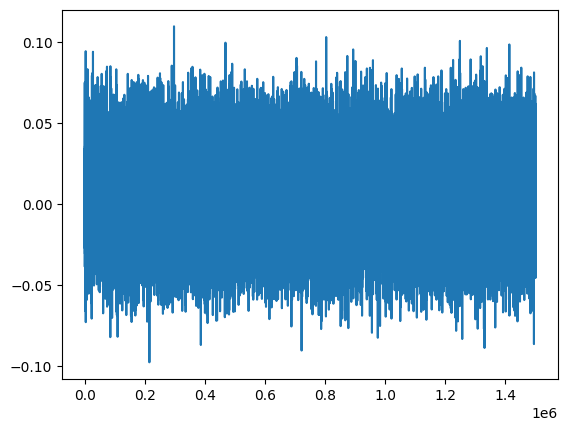

In [40]:
plt.plot(u)

In [41]:
def fSimSilverbox(u,x0,th,Ts):

    k1 = th[0]
    k3 = th[1]
    c = th[2]
    d = th[3]
    yOffset = th[4]
    uOffset = th[5]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]+yOffset
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*x2[k]; 
        x2[k+1] = x2[k] + Ts*(-k1*x1[k] -k3*x1[k]**2 -c*x2[k] + d*(u[k] - uOffset))
        y[k+1] = x1[k+1] + yOffset
    
    
    x = [x1,x2]
    return x, y

In [42]:
# def MechTranslation(u, x0, coeff, offset, Ts):
#     k1, k2, k3, m1  = coeff[0], coeff[1], coeff[2], coeff[3]

#     offsetu =  offset[0]
#     offsety =  offset[1]

#     N = u.shape[0]

#     x1  = np.zeros(N)
#     x2  = np.zeros(N)
#     x3  = np.zeros(N)

#     y   = np.zeros(N)

#     x1[0], x2[0], x3[0] = x0
#     y[0]= x3[0] + offsety

#     for k in range(N-1):
#         x1[k+1] = x1[k] + Ts*x2[k]
#         x2[k+1] = x2[k] + Ts*(-((k1+k2)/m)*x1[k] + (k1/m)*x3[k])
#         x3[k+1] = x3[k] + Ts*((k1/b)*x1[k] - (k1/b)*x3[k] + k3*(u[k]+offsetu))
        
#         y[k+1] = x3[k+1]+offsety
    
#     x = [x1, x2, x3]
#     return x, y

In [56]:
def fSimSilverboxSIN(u,x0,th,Ts):
    a2 = th[0]
    b1 = th[1]
    b2 = th[2]
    b3 = th[3]
    b4 = th[4]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*a2*x2[k]
        x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])
        y[k+1] = x1[k+1]
    
    
    x = np.c_[x1, x2]
    return x, y

In [44]:
def fSimSilverboxCUBE(u,x0,th,Ts):

    k1 = th[0]
    k3 = th[1]
    c = th[2]
    d = th[3]
    yOffset = th[4]
    uOffset = th[5]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]+yOffset
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*x2[k]
        x2[k+1] = x2[k] + Ts*(-k1*x1[k] -k3*x1[k]**3 -c*x2[k] + d*(u[k] - uOffset))
        y[k+1] = x1[k+1] + yOffset
    
    
    x = np.c_[x1, x2]
    return x, y

In [45]:
def fSimSilverboxSQUARE(u,x0,th,Ts):

    k1 = th[0]
    k3 = th[1]
    c = th[2]
    d = th[3]
    yOffset = th[4]
    uOffset = th[5]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]+yOffset
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*x2[k]
        x2[k+1] = x2[k] + Ts*(-k1*x1[k] -k3*x1[k]**2 -c*x2[k] + d*(u[k] - uOffset))
        y[k+1] = x1[k+1] + yOffset
    
    
    x = np.c_[x1, x2]
    return x, y

In [46]:
def fSimSilverboxSQUARE_2(u,x0,th,Ts):

    a2 = th[0]
    b1 = th[1]
    b2 = th[2]
    b3 = th[3]
    b4 = th[4]

    N = u.shape[0]
    
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))
    y = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]
    y[0] = x1[0]
    
    for k in range(N-1):
        x1[k+1] = x1[k] + Ts*a2*x2[k]
        x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*x1[k]**2 +b3*x2[k] + b4*u[k])
        y[k+1] = x1[k+1]
    
    
    x = np.c_[x1, x2]
    return x, y

In [47]:
def simpleNonLinear(u, x0, th, Ts):
  k1, k2, k3 = th[0], th[1], th[2]

  N = u.shape[0]
    
  x = np.zeros((N,1))
  x[0] = x0

  for k in range(N-1):
      x[k+1] = x[k]+Ts*(k1*x[k]+k2*x[k]**3+k3*u[k])

  return x, x

In [48]:
def simpleNonLinear_nx2(u, x0, th, Ts):
    k1, k2, k3, k4 = th[0], th[1], th[2], th[3]

    N = u.shape[0]
      
    x1 = np.zeros((N,1))
    x2 = np.zeros((N,1))

    x1[0] = x0[0]
    x2[0] = x0[0]

    for k in range(N-1):
        if np.abs(x1[k])>2 or np.abs(x2[k])>2:
            print("explode ", k)
            return None, None

        x1[k+1] = x1[k]+Ts*(k1*(x1[k])**2+k2*x2[k])
        x2[k+1] = x2[k]+Ts*(k3*(x2[k])**3+k4*u[k])

    x = np.c_[x1, x2]
    
    return x, x

In [49]:
# k3
th[1] = 0.002

# offset u,y
th[-1]=0
th[-2]=0


In [50]:
# plt.plot(u[:1000])
# plt.plot(y[:1000])
u = (u-np.mean(u))/(np.max(u)-np.min(u))

In [51]:
num_samples = 100000

# a2, b1, b2, b3, b4, x10
# 1.0000   -0.1482   -0.7426   -1.5302    4.8674   -1.1677

# best now ######################
# th = np.array([ 1.2,   -2,   -1,   -0.5,   1.4]) # square_2
#################################
# th = np.array([1.0000,   -0.05,   -0.05,   -0.05,    0.00001])
# th = np.array([1.2, 1.6, 1.4, 0.8, 0., 0.]) # USED fsil
# th = np.array([-0.5, 5, 0.5])
# th = np.array([-0.05, -0.05, -0.05, -0.001])

# th = np.array([ 0.05048335, -1.7459741,  -0.49110337, -1.22812396,  4.64409454])
th = np.array([ 1.4, -1.8, -3.0,  -2.1,  0.15])

# x0 = [0, 0]

x0 = [0, 0]
Ts = 1

# u = u[:10000]

# x = None
# x, y = fSimSilverbox(u, x0, th, Ts)
# x, y = fSimSilverboxSQUARE(u[:1000], x0, th, Ts)

###########################################
# x, y = fSimSilverboxSQUARE_2(u, x0, th, 0.1)
###########################################
# x, y = fSimSilverboxSQUARE_2(u, x0, th, 0.1)


# x, y = simpleNonLinear(u, x0, th, Ts)
# finish = 0
# while (finish != 1):
#   u = np.random.normal(0, 0.05, size=num_samples)
#   x, y = simpleNonLinear_nx2(u, x0, th, Ts)
#   if x:
#     finish = 1

# plt.plot(y[200:])
# plt.show()

# plt.plot(u[200:])
# plt.show()



In [52]:
# samples = 295001

# plt.plot(x[:,0])
# plt.plot(x[:,1])
# # plt.plot(u[:275000])
# plt.show()

In [57]:
x0 = [0, 0]
Ts = 1

params = np.zeros((1,5))
results = np.zeros((1,4))

for i in range(10000):
  # th = np.random.uniform(-5, 5, size=5)
  th = np.r_[1, np.random.uniform(-5, 5, size=4)]
  x, y = fSimSilverboxSIN(u[:10000], x0, th, 1)
  if (not np.isnan(x).any()) and (not np.isinf(x).any()):
    print(i)
    print("Params: {}".format(th))
    print("x1, max: {}, min: {}, std: {}, mean: {}".format(np.max(x[:,0]),np.min(x[:,0]), np.std(x[:,0]), np.mean(x[:,0])))
    print("x2, max: {}, min: {}, std: {}, mean: {}".format(np.max(x[:,1]),np.min(x[:,1]), np.std(x[:,1]), np.mean(x[:,1])))
    print()

    params = np.vstack((params, th))
    results = np.vstack((results, np.array([np.max(x[:,0]),np.min(x[:,0]),np.max(x[:,1]),np.min(x[:,1])])))

params = params[1:]
results = results[1:]

C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:20: RuntimeWarning: overflow encountered in multiply
  x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])
C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:20: RuntimeWarning: invalid value encountered in add
  x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])
C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:20: RuntimeWarning: invalid value encountered in sin
  x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])
C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:19: RuntimeWarning: overflow encountered in add
  x1[k+1] = x1[k] + Ts*a2*x2[k]
C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:20: RuntimeWarning: overflow encountered in add
  x2[k+1] = x2[k] + Ts*(b1*x1[k] +b2*np.sin(x1[k]) +b3*x2[k] + b4*u[k])


29
Params: [ 1.         -3.08463753  1.11213491 -2.77632551  0.84862498]
x1, max: 0.18221804238547537, min: -0.16388000150557877, std: 0.04996906426993372, mean: -0.0035108259545731874
x2, max: 0.1021273929424035, min: -0.12425248757519733, std: 0.0031611818011221425, mean: 9.883956684755515e-07

36
Params: [ 1.         -0.28911987  0.84629224 -0.71293267  3.23438871]
x1, max: 6.053275393413696, min: -5.966949260350346, std: 2.2297932852719704, mean: -0.6750978971858602
x2, max: 2.0300809462643326, min: -2.0927082910511325, std: 0.6787956687080882, mean: 0.00020786139671889362

37
Params: [ 1.          0.29379384 -2.11421978 -2.82615442  3.86703707]
x1, max: 1.1960993467478196, min: -0.9847511044210064, std: 0.2596848196929972, mean: -0.017710805969389287
x2, max: 0.4935898234731527, min: -0.5661970663360277, std: 0.019601990120910406, mean: 4.653936989335514e-06

80
Params: [ 1.         -2.13672495  0.53876565 -2.21825519 -0.55038218]
x1, max: 0.1314244876664079, min: -0.1462203796344

C:\Users\20173928\AppData\Local\Temp\ipykernel_2852\592457711.py:19: RuntimeWarning: invalid value encountered in add
  x1[k+1] = x1[k] + Ts*a2*x2[k]


102
Params: [ 1.         -0.33436878  4.50289277 -1.28755522  2.64155828]
x1, max: 11.215851365334833, min: -12.242672672448583, std: 4.217327953791152, mean: -0.30045005011344217
x2, max: 7.357354815813747, min: -7.237283711809161, std: 3.6197645541651355, mean: 0.00027420350516026674

140
Params: [ 1.         -2.96239966  1.03114262 -2.93888512  2.6981602 ]
x1, max: 0.5767181531939681, min: -0.5210730747838604, std: 0.16123887708857776, mean: -0.011351075696072991
x2, max: 0.38892878012470633, min: -0.39505449737936493, std: 0.014091731285343382, mean: 3.0925211149841343e-06

148
Params: [ 1.         -0.6088551  -4.77354325 -1.15599449  2.36278928]
x1, max: 11.866763969118418, min: -11.658154993572662, std: 4.697361809860794, mean: 0.03159939236933511
x2, max: 10.08768863770027, min: -10.02548426907942, std: 4.3514873583426885, mean: 0.0003783580996224744

149
Params: [ 1.         -1.74799445 -2.97513324 -2.86555102 -3.9388588 ]
x1, max: 13.931552057926034, min: -13.657390530014386, 

c:\Users\20173928\Miniconda3\envs\sindy\Lib\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


197
Params: [ 1.         -0.64823931 -3.88349006 -1.38383508  3.32125854]
x1, max: 8.689592804895106, min: -8.533862983917803, std: 3.145641059477325, mean: 0.17082115417699256
x2, max: 7.968992483000732, min: -7.767690655571128, std: 3.439366129804356, mean: -0.0005180857363649918

202
Params: [ 1.         -2.48520327  2.70776467 -2.15488465  0.09053973]
x1, max: 1.1491972574373466, min: -1.1464011087709398, std: 1.1192212954299094, mean: -0.0008450737207490482
x2, max: 2.2428911467693022, min: -2.246773280081204, std: 2.238390132869154, mean: -0.00011193091852242673

218
Params: [ 1.         -0.95537409  3.35900296 -2.51912221 -4.48528988]
x1, max: 5.704399798527973e+227, min: -6.012390424150232e+227, std: inf, mean: -3.085216849103119e+223
x2, max: 1.2349400432064062e+228, min: -1.1716790222678205e+228, std: inf, mean: 6.33701000791382e+223

222
Params: [ 1.         -0.68461505 -3.90753554 -1.86276458 -2.57332043]
x1, max: 6.523611071836996, min: -6.554312093823895, std: 4.767609750

KeyboardInterrupt: 

In [ ]:
a = np.array([1, -1, -1, -1, 1])

if a[0]>0 and a[-1]>0 and a[1:-1].all()<0:
  print("toy")

In [ ]:
np.all(a[1:-1]<0)

In [58]:
for idx, val in enumerate(params):
  if val[0]>0 and val[-1]>0 and np.all(val[1:-1]<0):
    print(idx)
    print(val)
    print(results[idx,:])
    print()

7
[ 1.         -0.6088551  -4.77354325 -1.15599449  2.36278928]
[ 11.86676397 -11.65815499  10.08768864 -10.02548427]

10
[ 1.         -1.20018687 -1.74535382 -3.06188837  3.74369219]
[ 0.55701101 -0.54813737  0.60706063 -0.54813737]

12
[ 1.         -0.64823931 -3.88349006 -1.38383508  3.32125854]
[ 8.6895928  -8.53386298  7.96899248 -7.76769066]

18
[ 1.         -2.99703302 -1.07034351 -3.66339559  4.28177932]
[ 2.28373537 -2.25087446  3.95829507 -3.9606476 ]

30
[ 1.         -1.37121117 -1.84751768 -1.9359516   1.17372953]
[ 3.10341635 -3.10286749  4.94501441 -4.87029672]

35
[ 1.         -2.26167381 -4.55639042 -2.22713754  4.18621303]
[ 1.38236924e+75 -1.37025192e+75  2.33120236e+75 -2.27667928e+75]

36
[ 1.         -1.59382791 -0.52789651 -2.44442022  0.63572953]
[ 0.12747474 -0.11451011  0.0472741  -0.09308113]

37
[ 1.         -0.51261213 -4.42074241 -0.56709373  4.01699251]
[ 60.52570784 -65.65498546  47.44366885 -44.35967321]

44
[ 1.         -3.20413105 -2.018351   -3.165904

In [ ]:
x[:,0].shape

In [ ]:
plt.plot(x[100:10000])
plt.show()

In [ ]:
input = x[:-1,:]
output = x[1:,:]

u_input = u[1:]
Theta = np.c_[np.ones(input.shape[0]), input[:,0], input[:,1], u_input, input[:,0]**2, input[:,0]**3, input[:,0]**4, np.sin(input[:,0])]
# , input[:,0]**3, input[:,0]**4, np.sin(input[:,0]), input[:,1]**2, input[:,1]**3, input[:,1]**4, np.sin(input[:,1])

import scipy.linalg as lin

U, S, Vh = np.linalg.svd(Theta[:10000,:])#, full_matrices=True 
plt.semilogy(S,"*")
plt.show()

coeff, _, _, _ = lin.lstsq(Theta, output)

plt.semilogy(np.abs(coeff[:,0]),"*", markersize=14)
plt.semilogy(np.abs([0, 1,   1.2,   0,   0]),"o")
plt.grid()
plt.show()
plt.semilogy(np.abs(coeff[:,1]),"*", markersize=14)
plt.semilogy(np.abs([0, -1.2,   1-1.4,   0.8,   -1.6]),"o", ) # -0.4=1+(-1.4)
plt.grid()
plt.show()

coeff, S

In [ ]:
plt.plot(x)
plt.show()
# plt.plot(u)
# plt.show()

In [ ]:
# plt.plot((y-np.mean(y))/np.std(y))

# plt.plot(u)
# plt.plot(x[:])
# plt.show()

# plt.plot(((x-np.mean(x, axis=0))/np.std(x, axis=0))[:1000])
# plt.plot(((u-np.mean(u, axis=0))/np.std(u, axis=0))[:1000],'--')
# plt.show()

import scipy.linalg as lin

input = x[:-1,:]
input = np.c_[input[:,0], input[:,1], u[:-1], input[:,0]**3]
# Theta_val = np.c_[np.ones(val_input.shape[0]), val_input[:,0], val_input[:,1], val_u_input, val_input[:,0]**2, val_input[:,1]**3]

output = x[1:,:]

coeff, _, _, _ = lin.lstsq(input, output)
print(coeff)

In [ ]:
np.sum(output-np.matmul(input, np.array([[1, -0.05, 0, -0.1, 0, 0],[0, 1, -0.03, 0, 0, -0.05]]).T))

In [ ]:
fig, axs = plt.subplots(2)
axs[0].plot(u[:1000])
axs[0].set( ylabel='input $u_k$')
axs[1].plot(y[:1000])
axs[1].set(xlabel='sample [-]', ylabel='output $y_k$')

In [ ]:
# th = np.array([-0.1, 0.5, 0.1, -0.2])

# th_mdic = {"th": th}
# u_mdic = {"u": u}
# x_mdic = {"x": x}
# y_mdic = {"y": y}

# savemat( "MSD1500k_coeff.mat", th_mdic)
# savemat("MSD1500k_u_data.mat", u_mdic)
# savemat("MSD1500k_x_data.mat", x_mdic)
# savemat("MSD1500k_y_data.mat", y_mdic)

In [ ]:
# th_mdic = {"th": th}
# u_mdic = {"u": u}
# x_mdic = {"x": x}
# y_mdic = {"y": x}

# savemat( "SNL100k_c_data.mat", th_mdic)
# savemat("SNL100k_u_data.mat", u_mdic)
# savemat("SNL100k_x_data.mat", x_mdic)
# savemat("SNL100k_y_data.mat", y_mdic)

In [ ]:
# th_mdic = {"th": th}
# u_mdic = {"u": u}
# x_mdic = {"x": x}
# y_mdic = {"y": y}

# savemat("MSDC31500k_c_data.mat", th_mdic)
# savemat("MSDC31500k_u_data.mat", u_mdic)
# savemat("MSDC31500k_x_data.mat", x_mdic)
# savemat("MSDC31500k_y_data.mat", y_mdic)